In [42]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense , InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("train.csv")

In [6]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [7]:
data.shape

(1000, 12)

In [8]:
data.columns.values.tolist()

['v.id',
 'on road old',
 'on road now',
 'years',
 'km',
 'rating',
 'condition',
 'economy',
 'top speed',
 'hp',
 'torque',
 'current price']

In [9]:
sns.pairplot(data[['v.id',
 'on road old',
 'on road now',
 'years',
 'km',
 'rating',
 'condition',
 'economy',
 'top speed',
 'hp',
 'torque',
 'current price']],diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

In [10]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(

[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02

  3.513180e+05]

 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01

  2.850015e+05]

 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01

  2.153860e+05]

 ...

 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01

  4.058710e+05]

 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02

  7.439800e+04]

 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01

  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [11]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(

[[6.000000e+02 6.592470e+05 8.385040e+05 2.000000e+00 1.132300e+05

  4.000000e+00 8.000000e+00 1.200000e+01 1.460000e+02 1.090000e+02

  1.210000e+02 3.130955e+05]

 [7.100000e+01 5.988890e+05 8.509990e+05 3.000000e+00 1.297210e+05

  3.000000e+00 2.000000e+00 1.400000e+01 1.460000e+02 8.400000e+01

  9.300000e+01 2.063355e+05]

 [4.390000e+02 5.057280e+05 7.497730e+05 5.000000e+00 1.005340e+05

  1.000000e+00 9.000000e+00 1.500000e+01 1.370000e+02 7.200000e+01

  1.190000e+02 2.538535e+05]

 [2.720000e+02 6.073600e+05 8.900360e+05 3.000000e+00 1.024350e+05

  5.000000e+00 6.000000e+00 9.000000e+00 1.460000e+02 7.000000e+01

  1.190000e+02 3.444950e+05]

 [5.820000e+02 6.737450e+05 7.420290e+05 3.000000e+00 6.672100e+04

  2.000000e+00 1.000000e+01 1.100000e+01 1.380000e+02 9.700000e+01

  9.500000e+01 4.911230e+05]], shape=(5, 12), dtype=float32)


In [12]:
x = tensor_data[:,3:-1]
print(x[:5])

tf.Tensor(

[[2.00000e+00 1.13230e+05 4.00000e+00 8.00000e+00 1.20000e+01 1.46000e+02

  1.09000e+02 1.21000e+02]

 [3.00000e+00 1.29721e+05 3.00000e+00 2.00000e+00 1.40000e+01 1.46000e+02

  8.40000e+01 9.30000e+01]

 [5.00000e+00 1.00534e+05 1.00000e+00 9.00000e+00 1.50000e+01 1.37000e+02

  7.20000e+01 1.19000e+02]

 [3.00000e+00 1.02435e+05 5.00000e+00 6.00000e+00 9.00000e+00 1.46000e+02

  7.00000e+01 1.19000e+02]

 [3.00000e+00 6.67210e+04 2.00000e+00 1.00000e+01 1.10000e+01 1.38000e+02

  9.70000e+01 9.50000e+01]], shape=(5, 8), dtype=float32)


In [13]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)

tf.Tensor(

[[313095.5]

 [206335.5]

 [253853.5]

 [344495. ]

 [491123. ]], shape=(5, 1), dtype=float32)


In [53]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [59]:
x_train = x[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)

(800, 1)


In [86]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [60]:
x_val = x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)

(100, 1)


In [87]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [61]:
x_test = x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)

(100, 1)


In [88]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [62]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x)[:5]


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.4891486 ,  0.42361072,  0.7097784 ,  0.85124004,  0.15931201,
        -1.0661567 ,  1.1651883 ,  0.829773  ],
       [-0.9022919 ,  0.99703765, -0.01172417, -1.3072133 ,  1.0632125 ,
        -1.0661567 , -0.0443906 , -0.49313796],
       [ 0.27142158, -0.01785602, -1.4547294 ,  1.2109823 ,  1.5151628 ,
        -1.5291997 , -0.62498844,  0.7352794 ],
       [-0.9022919 ,  0.04824577,  1.4312811 ,  0.1317556 , -1.1965388 ,
        -1.0661567 , -0.7217548 ,  0.7352794 ],
       [-0.9022919 , -1.1936055 , -0.7332268 ,  1.5707245 , -0.29263824,
        -1.4777504 ,  0.58459044, -0.39864433]], dtype=float32)>

In [15]:
print(x[:5])

tf.Tensor(

[[2.00000e+00 1.13230e+05 4.00000e+00 8.00000e+00 1.20000e+01 1.46000e+02

  1.09000e+02 1.21000e+02]

 [3.00000e+00 1.29721e+05 3.00000e+00 2.00000e+00 1.40000e+01 1.46000e+02

  8.40000e+01 9.30000e+01]

 [5.00000e+00 1.00534e+05 1.00000e+00 9.00000e+00 1.50000e+01 1.37000e+02

  7.20000e+01 1.19000e+02]

 [3.00000e+00 1.02435e+05 5.00000e+00 6.00000e+00 9.00000e+00 1.46000e+02

  7.00000e+01 1.19000e+02]

 [3.00000e+00 6.67210e+04 2.00000e+00 1.00000e+01 1.10000e+01 1.38000e+02

  9.70000e+01 9.50000e+01]], shape=(5, 8), dtype=float32)


In [74]:
model = tf.keras.Sequential([
                              InputLayer(input_shape=(8,)),
                              normalizer,
                              Dense(128, activation = "relu"),
                              Dense(128, activation = "relu"),
                              Dense(128, activation = "relu"),
                              Dense(1)
])
model.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 normalization_1 (Normaliza  (None, 8)                 17        

 tion)                                                           

                                                                 

 dense_5 (Dense)             (None, 128)               1152      

                                                                 

 dense_6 (Dense)             (None, 128)               16512     

                                                                 

 dense_7 (Dense)             (None, 128)               16512     

                                                                 

 dense_8 (Dense)             (None, 1)                 129       

                                                                 


Total params: 34322 (134.07 KB)

Trainable params: 34305 (134.00 KB)

Non-trainable params: 17 (72.00 By

In [94]:
model.compile(optimizer = Adam(learning_rate=0.1),
              loss=MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [95]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs=100,verbose=1)

Epoch 1/100

25/25 [==============================] - 3s 16ms/step - loss: 29003.9219 - root_mean_squared_error: 38206.6602 - val_loss: 30529.7891 - val_root_mean_squared_error: 39030.3281

Epoch 2/100

25/25 [==============================] - 0s 4ms/step - loss: 23944.6016 - root_mean_squared_error: 31901.8066 - val_loss: 22893.2500 - val_root_mean_squared_error: 30633.9297

Epoch 3/100

25/25 [==============================] - 0s 4ms/step - loss: 22629.2168 - root_mean_squared_error: 30095.7383 - val_loss: 20408.9121 - val_root_mean_squared_error: 28018.8926

Epoch 4/100

25/25 [==============================] - 0s 5ms/step - loss: 23145.6777 - root_mean_squared_error: 31166.3203 - val_loss: 30002.7852 - val_root_mean_squared_error: 37552.9531

Epoch 5/100

25/25 [==============================] - 0s 4ms/step - loss: 21718.4629 - root_mean_squared_error: 29556.5703 - val_loss: 25485.7734 - val_root_mean_squared_error: 32988.6484

Epoch 6/100

25/25 [==============================] - 

In [96]:
history.history

{'loss': [29003.921875,
  23944.6015625,
  22629.216796875,
  23145.677734375,
  21718.462890625,
  22970.927734375,
  20861.208984375,
  22718.0078125,
  25074.421875,
  25722.119140625,
  22034.009765625,
  21869.890625,
  21013.955078125,
  21365.609375,
  21703.509765625,
  20217.025390625,
  19647.22265625,
  20857.828125,
  21657.4375,
  24478.63671875,
  20634.296875,
  21139.294921875,
  21776.029296875,
  22402.591796875,
  21982.275390625,
  21949.33203125,
  22135.470703125,
  23310.607421875,
  24032.3515625,
  21757.517578125,
  21706.962890625,
  19501.453125,
  24640.994140625,
  23101.017578125,
  20346.3359375,
  22300.814453125,
  22913.76171875,
  22197.4375,
  21620.453125,
  20509.630859375,
  18911.78125,
  21159.087890625,
  20274.900390625,
  19881.755859375,
  19053.490234375,
  19624.66796875,
  20346.880859375,
  18864.837890625,
  20194.751953125,
  19206.953125,
  19941.783203125,
  18181.453125,
  20678.24609375,
  20976.525390625,
  20549.10546875,
  2844

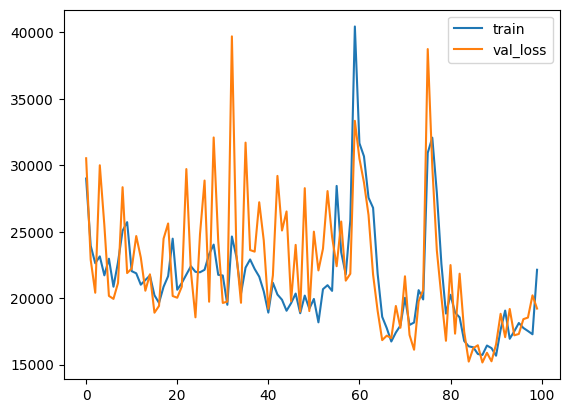

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val_loss'])

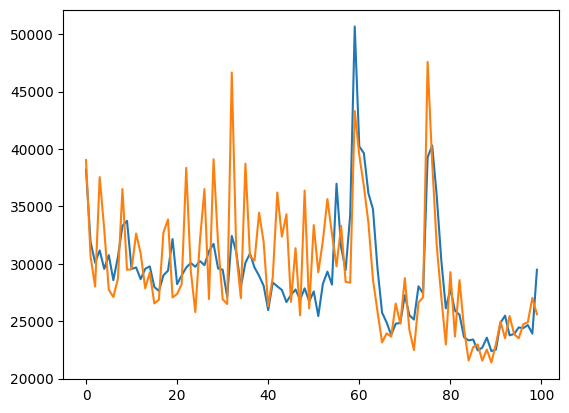

In [98]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

In [99]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 43961.0000 - root_mean_squared_error: 52874.6289


[43961.0, 52874.62890625]